# Exercício 7 - Aprendizado Estatístico

## Importanto as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC

## Importando o Iris Dataset

In [2]:
iris_dataset = datasets.load_iris()

**Separando dados importantes do dataset**

In [3]:
attributes = iris_dataset.data
target = iris_dataset.target
labels = iris_dataset.target_names
features = iris_dataset.feature_names

### Filtrando o Iris Dataset

Para o teste comparativo serão mantidos somente os dois primeiros features (Sepal Width e Sepal Length) e as classes Setosa e Versicolor

In [4]:
filtered_iris = attributes[:100, :2]
filtered_target = target[:100]

# Regressão Linear - Método dos Mínimos Quadrados

A Regressão Linear é um método estatístico utilizado para estimar uma função que melhor representa o relacionamento entre as variáveis de entrada e de saída.

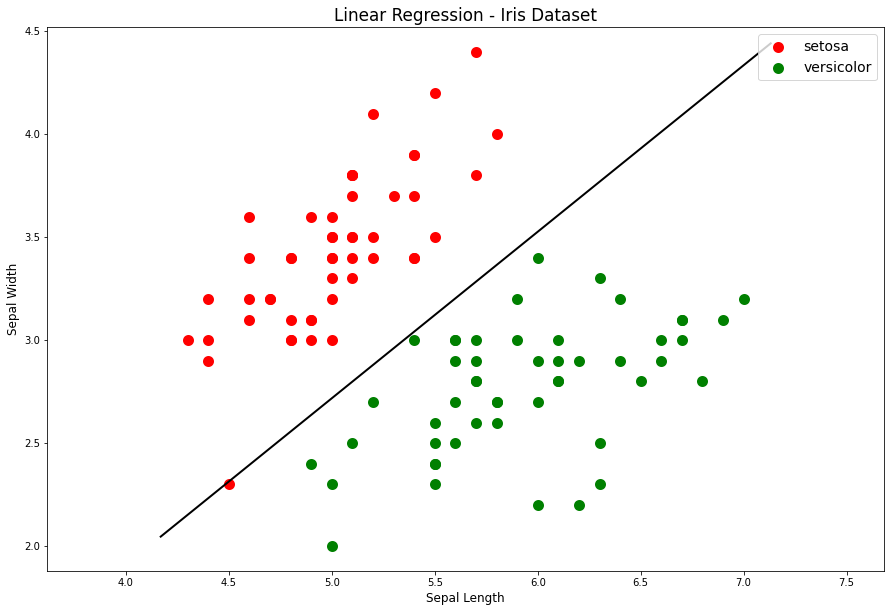

In [5]:
lr = LinearRegression() # Cria o modelo
lr.fit(filtered_iris, filtered_target) # Treina o modelo 

plt.figure(figsize=(15,10)) # Cria uma instância do gráfico
colors = ['red', 'green'] # Vetor de cores para as classes
for color, i, label in zip(colors, range(2), labels[:2]): # Imprime as classes em função dos features
    plt.scatter(filtered_iris[filtered_target == i, 0], filtered_iris[filtered_target == i, 1], color=color, alpha=1, lw=5, label=label)

# Imprime a reta obtida pela regressão
nx, ny = 100, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
B = lr.predict(np.c_[xx.ravel(), yy.ravel()])
B = B.reshape(xx.shape)
plt.contour(xx, yy, B, [0.5], linewidths=2., colors='k')

# Imprime demais dados do gráfico
plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.title('Linear Regression - Iris Dataset')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.axis('equal')
plt.show()

# Principal Component Analysis (PCA)

A Análise de Componentes Principais, ou PCA (Principal Component Analysis) consiste em um método estatístico para identificar a combinação de atributos, isto é, de componentes principais ou direções, que gerem a maior variância em um conjunto de dados.

Abaixo está a análise de PCA com 2 componentes (bidimensional) para o Iris Dataset

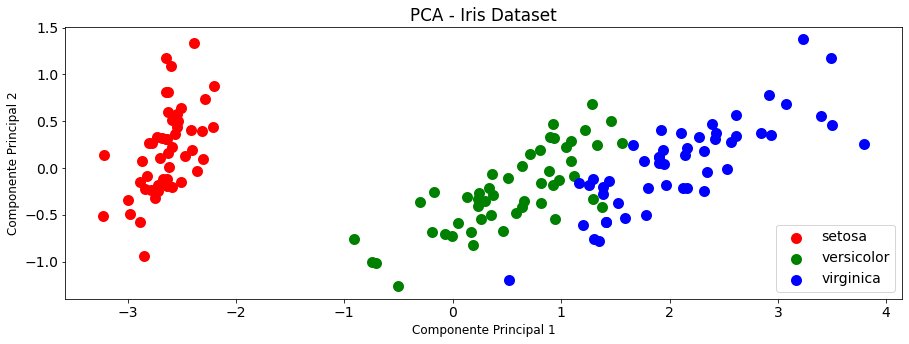

In [6]:
pca = PCA(n_components=2) # Cria o modelo

result = pca.fit(attributes).transform(attributes) # Aplica o PCA nos dados de entrada
colors = ['red', 'green', 'blue']
plt.figure(figsize=(15,5))

# Imprime o gráfico com a classificação do dataset
for color, i, label in zip(colors, range(3), labels):
    plt.scatter(result[target == i, 0], result[target == i, 1], color=color, alpha=1, lw=5, label=label)

plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.title('PCA - Iris Dataset')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.show()

### Executando o PCA para os dois features e analisando os componentes

Serão mantidos somente os dois primeiros features (Sepal Width e Sepal Length) e as classes Setosa e Versicolor

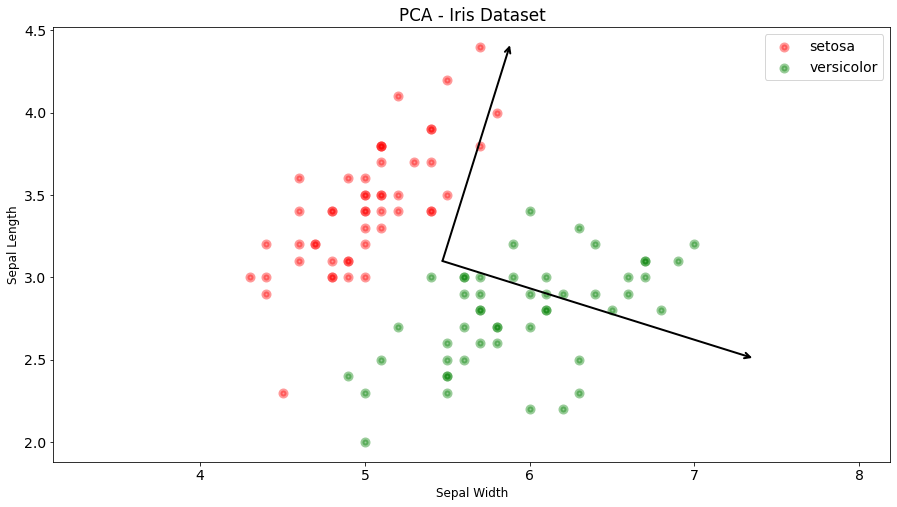

In [7]:
pca_sepal = PCA(n_components=2) # Cria o modelo
sepal_result = pca_sepal.fit(filtered_iris).transform(filtered_iris) # Aplica o PCA nos dados de entrada

fig, ax = plt.subplots(figsize=(15,8)) # Cria o gráfico

colors = ['red', 'green'] 
for color, i, label in zip(colors, range(2), labels[:2]): # Imprime os dados no gráfico
    plt.scatter(filtered_iris[filtered_target == i, 0], filtered_iris[filtered_target == i, 1], color=color, alpha=.4, lw=4, label=label)

# Cria e imprime os vetores para os componentes
for length, vector in zip(pca_sepal.explained_variance_, pca_sepal.components_): 
    v = vector * 3 * np.sqrt(length)
    v0 = pca_sepal.mean_
    v1 = pca_sepal.mean_ + v

    arrow = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrow)


plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.title('PCA - Iris Dataset')
plt.xlabel('Sepal Width', fontsize=12)
plt.ylabel('Sepal Length', fontsize=12)
plt.axis('equal')
plt.show()

# Linear Discriminant Analysis (LDA)

A Análise do Discriminante Linear, ou Linear Discriminant Analysis (LDA), tem o objetivo de identificar os atributos que garantem a maior variância entre cada classe de um dataset.

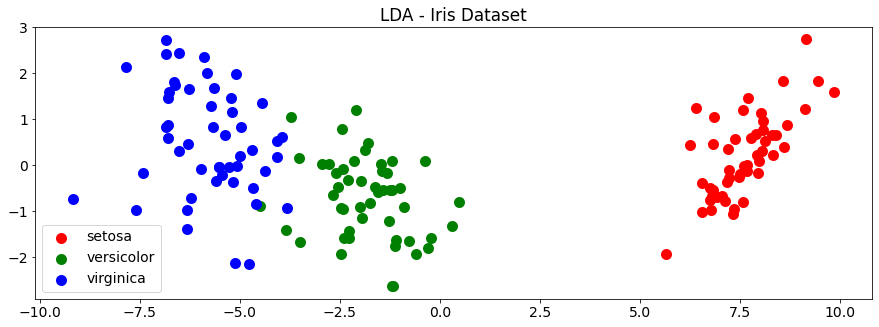

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2) # Cria o modelo
lda_result = lda.fit(attributes, target).transform(attributes)  # Treina o modelo

plt.figure(figsize=(15,5)) # Cria o gráfico
colors = ['red', 'green', 'blue']
for color, i, label in zip(colors, range(3), labels): # Imprime o dataset classificado pelo LDA
    plt.scatter(lda_result[target == i, 0], lda_result[target == i, 1], color=color, alpha=1, lw=5, label=label)
    
plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.title('LDA - Iris Dataset')

plt.show()

### Executando o LDA para os dois features e analisando a reta resultante

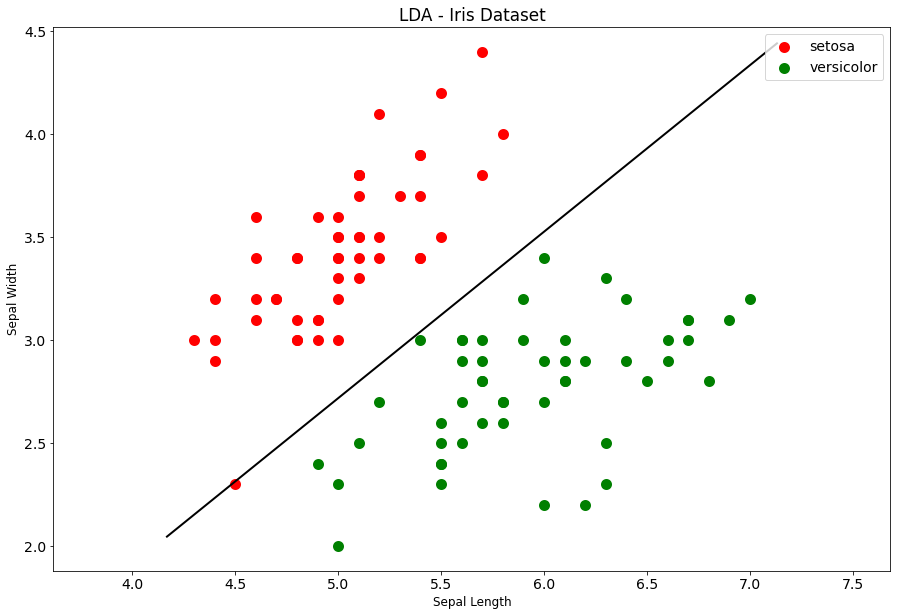

In [9]:
lda_sepal = LinearDiscriminantAnalysis(n_components=1) # Cria o modelo
lda_sepal_result = lda_sepal.fit(filtered_iris, filtered_target).transform(filtered_iris) # Treina o modelo

plt.figure(figsize=(15,10)) # Cria o gráfico
colors = ['red', 'green']
for color, i, label in zip(colors, range(2), labels[:2]): # Imprime o dataset
    plt.scatter(filtered_iris[filtered_target == i, 0], filtered_iris[filtered_target == i, 1], color=color, alpha=1, lw=5, label=label)
    
# Configurações do gráfico
plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.title('LDA - Iris Dataset')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.axis('equal')

# Imprime a reta gerada pelo LDA para separação das classes
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = lda_sepal.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.show()

## Support Vector Machine (SVM)

Uma Máquina de Vetores de Suporte, ou Support Vector Machine (SVM) consiste em um classificador que maximiza a largura da margem que separa as classes analisadas.

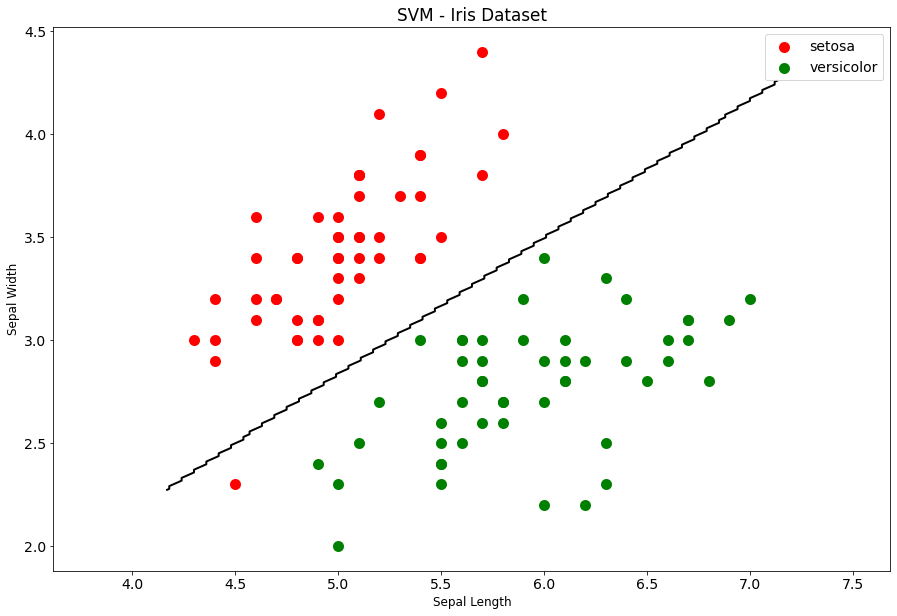

In [10]:
svm = LinearSVC() # Cria o modelo
svm.fit(filtered_iris, filtered_target) # Treina o modelo

plt.figure(figsize=(15,10)) # Cria o gráfico
colors = ['red', 'green']
for color, i, label in zip(colors, range(2), labels[:2]): # Imprime o dataset
    plt.scatter(filtered_iris[filtered_target == i, 0], filtered_iris[filtered_target == i, 1], color=color, alpha=1, lw=5, label=label)

# Imprime a reta para divisão das classes
nx, ny = 100, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

A = svm.predict(np.c_[xx.ravel(), yy.ravel()])
A = A.reshape(xx.shape)

plt.contour(xx, yy, A, [0.5], linewidths=2., colors='k')

plt.rcParams.update({'font.size': 14})
plt.legend(loc='best', scatterpoints=1)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('SVM - Iris Dataset')
plt.axis('equal')
plt.show()